### Diabetes Prediction model using Decision tree

#### Steps : 
##### 1) import required libraries
##### 2) Data preparation (Fetching data, statistical analysis, data visualization)
##### 3) Data preprocessing (Null values, treating with outliers, Splitting the data and feature Scaling)
##### 4) Decision tree model

In [2]:
# for structured data manupulation, data exploration 
import pandas as pd

# for numerical computin in python
import numpy as np

# for data visulisation and graph ploting 
import matplotlib.pyplot as plt

# for  scatter plots, heatmaps, distribution plots
import seaborn as sns

# for spliting data in train and test 
from sklearn.model_selection import train_test_split

# for ploting the data in decision tree import decision tree classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# for data preprocessing 
from sklearn import preprocessing 
from sklearn.preprocessing import RobustScaler  # scales features using statistics that are robust to outliers
from sklearn.preprocessing import StandardScaler

### Diabetes
##### This is Diabetes dataset. you can use this data set for prediction. in this dataset have many parameters such as Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigree, Age, Outcome.

In [3]:
df = pd.read_csv('Data Set/diabetes.csv')
df.head(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

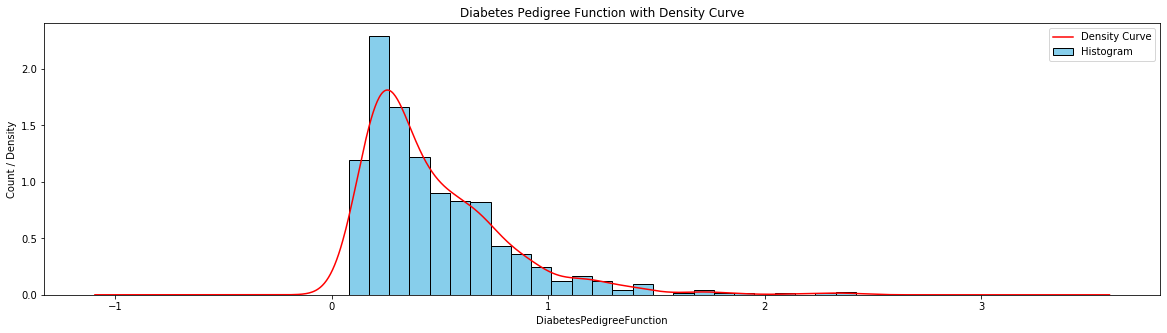

In [9]:
fig,ax= plt.subplots(figsize = (20, 5))
ax.hist(df['DiabetesPedigreeFunction'], bins =25, edgecolor = 'black',color = 'skyblue',density = True)
df['DiabetesPedigreeFunction'].plot(kind = 'kde', color = 'red')

ax.set_xlabel('DiabetesPedigreeFunction')
ax.set_ylabel('Count / Density')
ax.set_title('Diabetes Pedigree Function with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

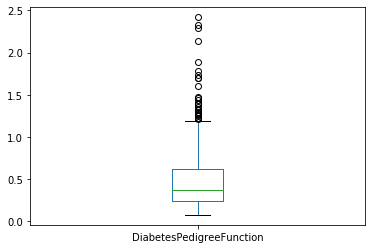

In [10]:
df['DiabetesPedigreeFunction'].plot(kind="box")

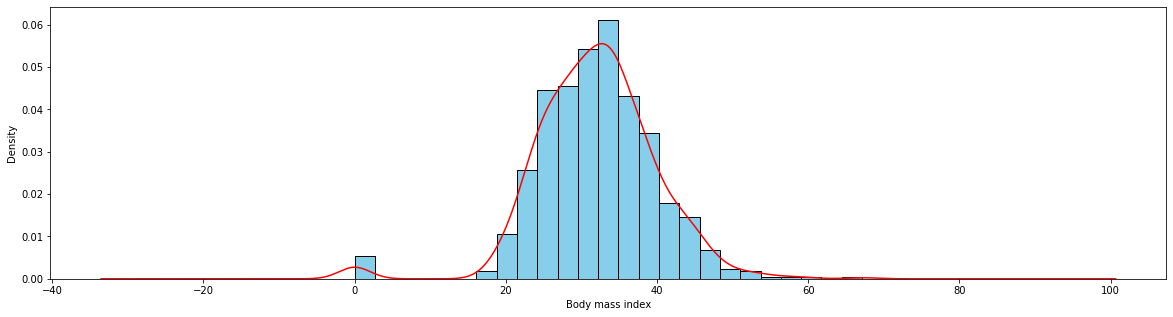

In [11]:
fig,ay= plt.subplots(figsize = (20, 5))
ay.hist(df['BMI'], bins =25, edgecolor = 'black',color = 'skyblue',density = True)
df['BMI'].plot(kind = 'kde', color = 'red')
ay.set_xlabel('Body mass index')
plt.show()

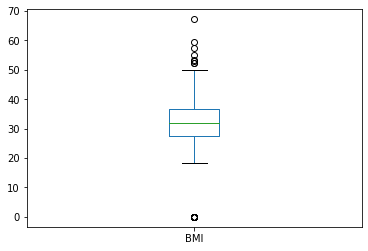

In [12]:
df['BMI'].plot(kind="box")

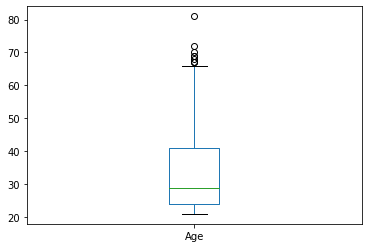

In [13]:
df['Age'].plot(kind="box")

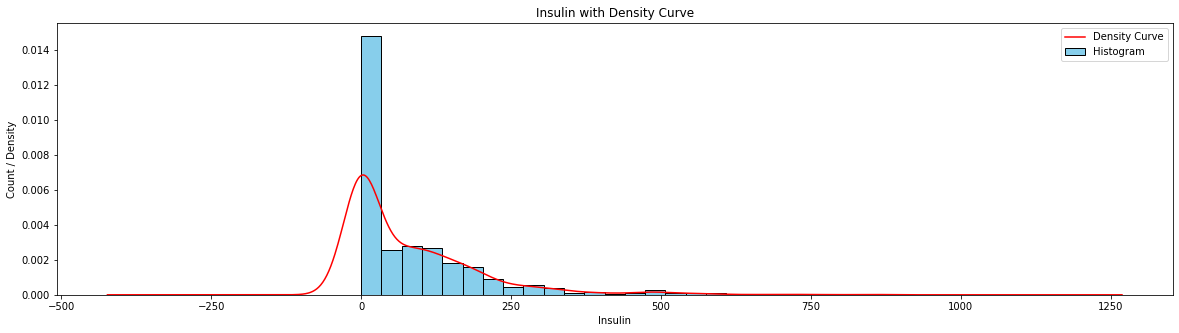

In [14]:
fig,az= plt.subplots(figsize = (20, 5))
az.hist(df['Insulin'], bins =25, edgecolor = 'black',color = 'skyblue',density = True)
df['Insulin'].plot(kind = 'kde', color = 'red')

az.set_xlabel('Insulin')
az.set_ylabel('Count / Density')
az.set_title('Insulin with Density Curve')
az.legend(['Density Curve', 'Histogram'])
plt.show()

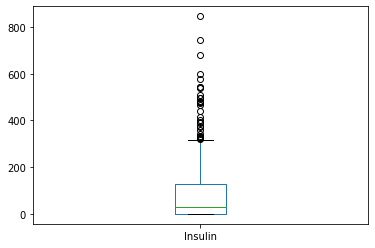

In [15]:
df['Insulin'].plot(kind="box")

In [16]:
input_features= [col for col in df.columns if "Outcome" not in col]
for col in input_features:
    df[col] = RobustScaler().fit_transform(df[[col]])

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.6,0.751515,0.000000,0.37500,-0.239686,0.172043,0.665359,1.235294,1
1,-0.4,-0.775758,-0.333333,0.18750,-0.239686,-0.580645,-0.056209,0.117647,0
2,1.0,1.600000,-0.444444,-0.71875,-0.239686,-0.935484,0.783007,0.176471,1
3,-0.4,-0.678788,-0.333333,0.00000,0.499018,-0.419355,-0.537255,-0.470588,0
4,-0.6,0.484848,-1.777778,0.37500,1.080550,1.193548,5.007843,0.235294,1


In [17]:
df.shape

(768, 9)

In [18]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Outlier •	Treating the outliers

In [19]:
limit_1 = df['Insulin'].quantile(0.25)
limit_3 = df['Insulin'].quantile(0.75)
IQR = limit_3 - limit_1
lower_limit = limit_1 - 1.5 * IQR
upper_limit = limit_3 + 1.5 * IQR

df = df[(df['Insulin'] > lower_limit) & (df['Insulin'] < upper_limit)]

In [20]:
limit_1 = df['BMI'].quantile(0.25)
limit_3 = df['BMI'].quantile(0.75)
IQR = limit_3 - limit_1
lower_limit = limit_1 - 1.5 * IQR
upper_limit = limit_3 + 1.5 * IQR

df = df[(df['BMI'] > lower_limit) & (df['BMI'] < upper_limit)]

In [21]:
limit_1 = df['DiabetesPedigreeFunction'].quantile(0.25)
limit_3 = df['DiabetesPedigreeFunction'].quantile(0.75)
IQR = limit_3 - limit_1
lower_limit = limit_1 - 1.5 * IQR
upper_limit = limit_3 + 1.5 * IQR

df = df[(df['DiabetesPedigreeFunction'] > lower_limit) & (df['DiabetesPedigreeFunction'] < upper_limit)]

In [22]:
limit_1 = df['Glucose'].quantile(0.25)
limit_3 = df['Glucose'].quantile(0.75)
IQR = limit_3 - limit_1
lower_limit = limit_1 - 1.5 * IQR
upper_limit = limit_3 + 1.5 * IQR

df = df[(df['Glucose'] > lower_limit) & (df['Glucose'] < upper_limit)]

In [23]:
limit_1 = df['Pregnancies'].quantile(0.25)
limit_3 = df['Pregnancies'].quantile(0.75)
IQR = limit_3 - limit_1
lower_limit = limit_1 - 1.5 * IQR
upper_limit = limit_3 + 1.5 * IQR

df = df[(df['Pregnancies'] > lower_limit) & (df['Pregnancies'] < upper_limit)]

In [24]:
limit_1 = df['BloodPressure'].quantile(0.25)
limit_3 = df['BloodPressure'].quantile(0.75)
IQR = limit_3 - limit_1
lower_limit = limit_1 - 1.5 * IQR
upper_limit = limit_3 + 1.5 * IQR

df = df[(df['BloodPressure'] > lower_limit) & (df['BloodPressure'] < upper_limit)]

In [25]:
limit_1 = df['Age'].quantile(0.25)
limit_3 = df['Age'].quantile(0.75)
IQR = limit_3 - limit_1
lower_limit = limit_1 - 1.5 * IQR
upper_limit = limit_3 + 1.5 * IQR

df = df[(df['Age'] > lower_limit) & (df['Age'] < upper_limit)]

In [26]:
limit_1 = df['SkinThickness'].quantile(0.25)
limit_3 = df['SkinThickness'].quantile(0.75)
IQR = limit_3 - limit_1
lower_limit = limit_1 - 1.5 * IQR
upper_limit = limit_3 + 1.5 * IQR

df = df[(df['SkinThickness'] > lower_limit) & (df['SkinThickness'] < upper_limit)]

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,620.0,0.149032,0.649182,-0.600000,-0.400000,0.000000,0.600000,2.000000
Glucose,620.0,0.012160,0.670926,-1.769697,-0.442424,-0.109091,0.412121,1.842424
BloodPressure,620.0,-0.001523,0.630498,-1.888889,-0.444444,0.000000,0.444444,1.888889
SkinThickness,620.0,-0.067692,0.476694,-0.718750,-0.718750,0.000000,0.281250,1.156250
Insulin,620.0,0.278560,0.619005,-0.239686,-0.239686,0.078585,0.703340,2.259332
BMI,620.0,0.001231,0.693472,-1.483871,-0.505376,0.000000,0.422043,1.935484
DiabetesPedigreeFunction,620.0,0.135969,0.639985,-0.769935,-0.349673,-0.043137,0.548366,2.064052
Age,620.0,0.188235,0.618535,-0.470588,-0.294118,0.000000,0.588235,2.000000
Outcome,620.0,0.301613,0.459329,0.000000,0.000000,0.000000,1.000000,1.000000


In [28]:
x = df.iloc[:,0:8]
y = df.iloc[:,8]

In [29]:
x


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.751515,0.000000,0.37500,-0.239686,0.172043,0.665359,1.235294
1,-0.4,-0.775758,-0.333333,0.18750,-0.239686,-0.580645,-0.056209,0.117647
2,1.0,1.600000,-0.444444,-0.71875,-0.239686,-0.935484,0.783007,0.176471
3,-0.4,-0.678788,-0.333333,0.00000,0.499018,-0.419355,-0.537255,-0.470588
5,0.4,-0.024242,0.111111,-0.71875,-0.239686,-0.688172,-0.448366,0.058824
...,...,...,...,...,...,...,...,...
763,1.4,-0.387879,0.222222,0.78125,1.174853,0.096774,-0.526797,2.000000
764,-0.2,0.121212,-0.111111,0.12500,-0.239686,0.516129,-0.084967,-0.117647
765,0.4,0.096970,0.000000,0.00000,0.640472,-0.623656,-0.333333,0.058824
766,-0.4,0.218182,-0.666667,-0.71875,-0.239686,-0.204301,-0.061438,1.058824


In [30]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 620, dtype: int64

In [31]:
# Splitting the dataset into train and test 

x_train,x_test,y_train, y_test = train_test_split(x,y,test_size= 0.3, random_state=15)

In [32]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((434, 8), (186, 8), (434,), (186,))

### Building Decision Tree Classifier using "gini" as a Criterion

In [33]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

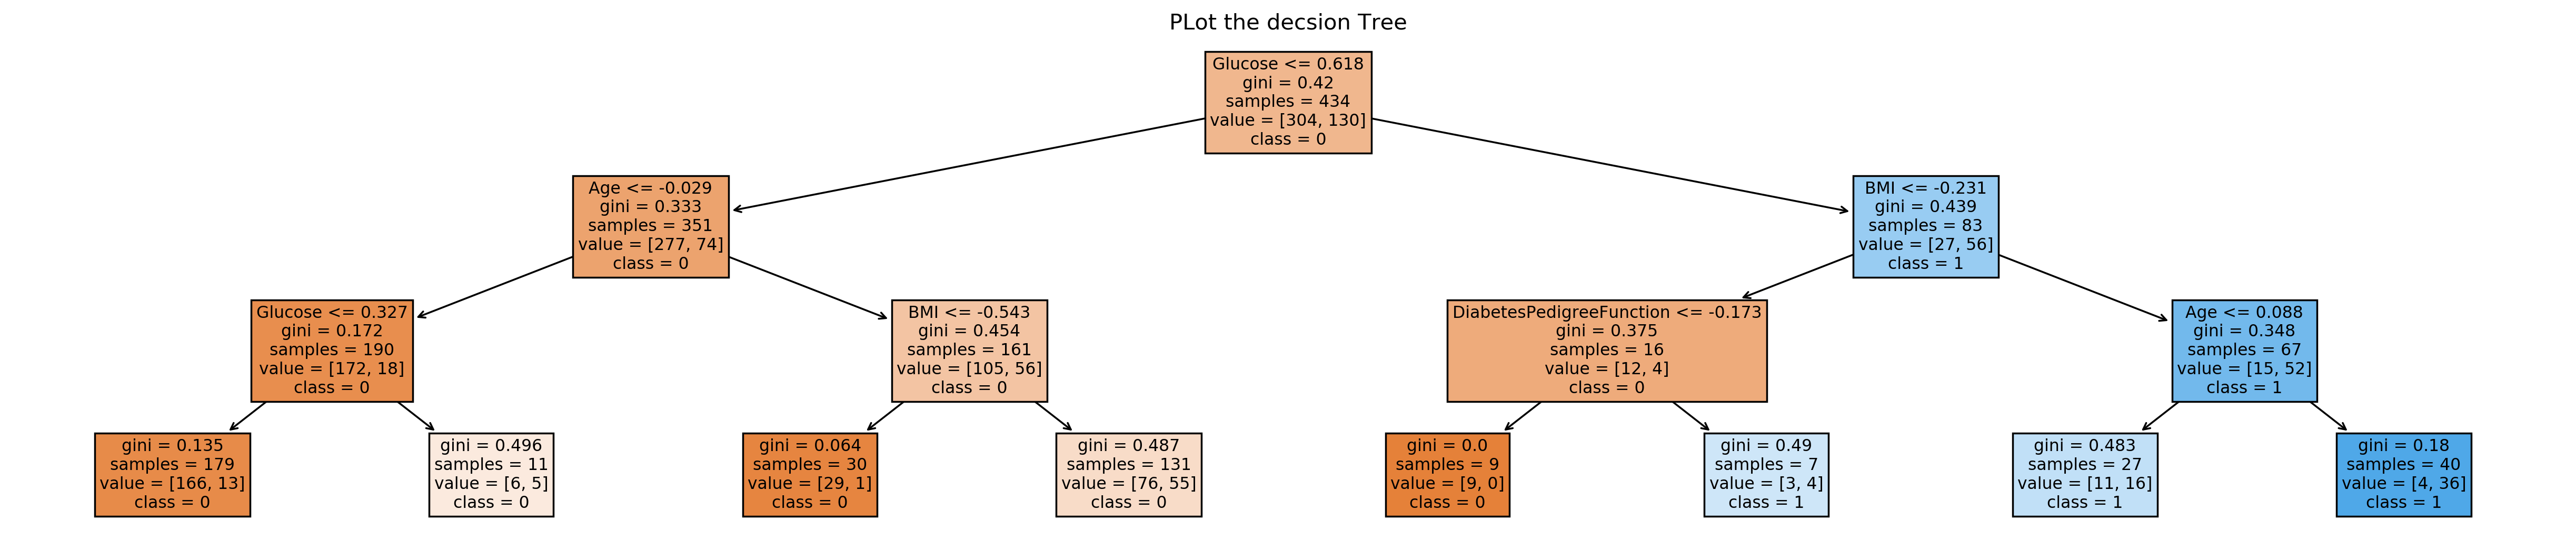

In [34]:
fn = ['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
cn = ['0','1']
fig,ax= plt.subplots(nrows=1,ncols=1,figsize=(25,5),dpi=250)
tree.plot_tree(model,feature_names=fn, class_names=cn ,filled=True)

ax.set_title('PLot the decsion Tree')
plt.show()

In [35]:
predc1= model.predict(x_test)

In [36]:
pd.Series(predc1).value_counts()

0    156
1     30
dtype: int64

In [37]:
pd.crosstab(y_test,predc1)

col_0,0,1
Outcome,,
0,121,8
1,35,22


In [38]:
aquracy = np.mean(predc1==y_test)
print ('Model dibetic prediction aquracy is  :')
print (aquracy)

Model dibetic prediction aquracy is  :
0.7688172043010753


### Building Decision Tree Classifier using "entropy" as a Criterion

In [39]:
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(697.5, 237.82500000000002, 'Glucose <= 0.012\nentropy = 0.881\nsamples = 434\nvalue = [304, 130]\nclass = O'),
 Text(348.75, 169.875, 'Age <= 0.088\nentropy = 0.602\nsamples = 252\nvalue = [215, 37]\nclass = O'),
 Text(174.375, 101.92500000000001, 'SkinThickness <= 0.203\nentropy = 0.334\nsamples = 162\nvalue = [152, 10]\nclass = O'),
 Text(87.1875, 33.974999999999994, 'entropy = 0.125\nsamples = 117\nvalue = [115, 2]\nclass = O'),
 Text(261.5625, 33.974999999999994, 'entropy = 0.675\nsamples = 45\nvalue = [37, 8]\nclass = O'),
 Text(523.125, 101.92500000000001, 'Glucose <= -0.667\nentropy = 0.881\nsamples = 90\nvalue = [63, 27]\nclass = O'),
 Text(435.9375, 33.974999999999994, 'entropy = 0.0\nsamples = 22\nvalue = [22, 0]\nclass = O'),
 Text(610.3125, 33.974999999999994, 'entropy = 0.969\nsamples = 68\nvalue = [41, 27]\nclass = O'),
 Text(1046.25, 169.875, 'Glucose <= 0.909\nentropy = 1.0\nsamples = 182\nvalue = [89, 93]\nclass = u'),
 Text(871.875, 101.92500000000001, 'BMI <= -

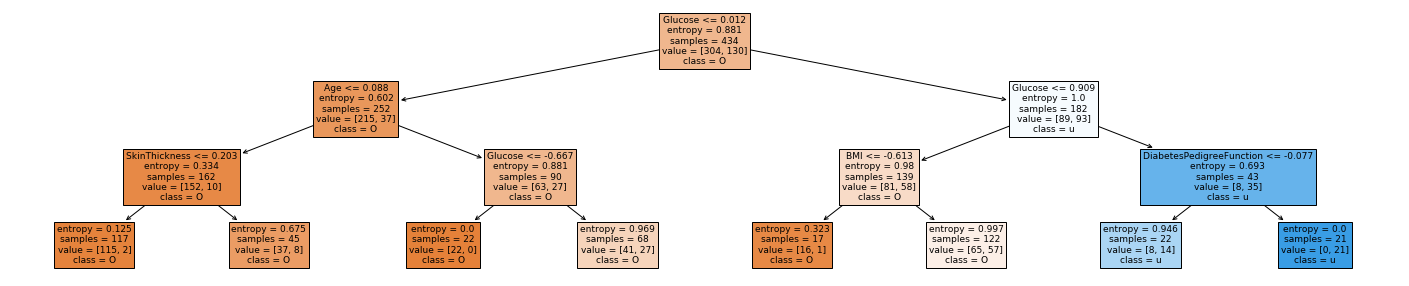

In [40]:
fig = plt.figure(figsize=(25,5))
tree.plot_tree(model2, feature_names=df.columns[:-1], class_names=df.columns[-1],filled=True)


In [41]:
predc2= model2.predict(x_test)

In [42]:
pd.Series(predc2).value_counts()

0    160
1     26
dtype: int64

In [43]:
pd.crosstab(y_test,predc1)

col_0,0,1
Outcome,,
0,121,8
1,35,22


In [52]:
x_test.loc[:,'predc1'] = predc1
x_test.loc[:,'y_test'] = y_test
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,predc1,y_test
692,-0.2,0.096970,-0.111111,0.28125,0.506876,0.763441,1.342484,-0.352941,0,0
59,-0.6,-0.290909,-0.444444,0.56250,0.876228,1.021505,-0.521569,-0.411765,0,0
276,0.8,-0.266667,-0.666667,0.03125,-0.239686,-0.591398,-0.200000,0.000000,0,1
615,0.0,-0.266667,0.000000,-0.71875,-0.239686,-0.666667,-0.432680,-0.117647,0,0
460,1.2,0.072727,0.000000,-0.03125,0.200393,-1.204301,0.942484,1.117647,0,0
...,...,...,...,...,...,...,...,...,...,...
764,-0.2,0.121212,-0.111111,0.12500,-0.239686,0.516129,-0.084967,-0.117647,0,0
98,0.6,-0.581818,-1.222222,0.21875,0.263261,-0.354839,-0.043137,-0.352941,0,0
95,0.6,0.654545,0.000000,0.12500,1.552063,0.204301,-0.307190,0.647059,1,0
748,0.0,1.696970,-0.111111,-0.03125,1.332024,0.473118,0.092810,0.411765,1,1


In [53]:
aquracy = np.mean(predc2==y_test)
print ('Model dibetic prediction aquracy % is  :')
print (aquracy)

Model dibetic prediction aquracy % is  :
0.7795698924731183
